# Random Tree Algorithm
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle both numerical and categorical data and is capable of capturing complex relationships in the data. It does not require feature standardization as they are not sensitive to the scale of the features. Random Forest algorithms work by creating decision trees based on random subsets of features, and each decision tree independently makes decisions based on these features.

In [2]:
%pip install pandas
%pip install plotly
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor  # for regression tasks
from sklearn.ensemble import RandomForestClassifier  # for classification tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [12]:
# loading data
data = pd.read_csv('cleaned_badminton_v2.csv')
data = data.drop(columns=['Unnamed: 0'])
# Define X and Y features
X_features = data[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                        'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                        'OBSERVATION NUMBER',
                        'SERVING SHOT']]

Y_features = data[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Z) metres']]
# splitting data into X, Y train test, 80/20
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.2, random_state=42)


KeyError: "['SERVING_SHOT'] not in index"

In [9]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # for regression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.738002800472812


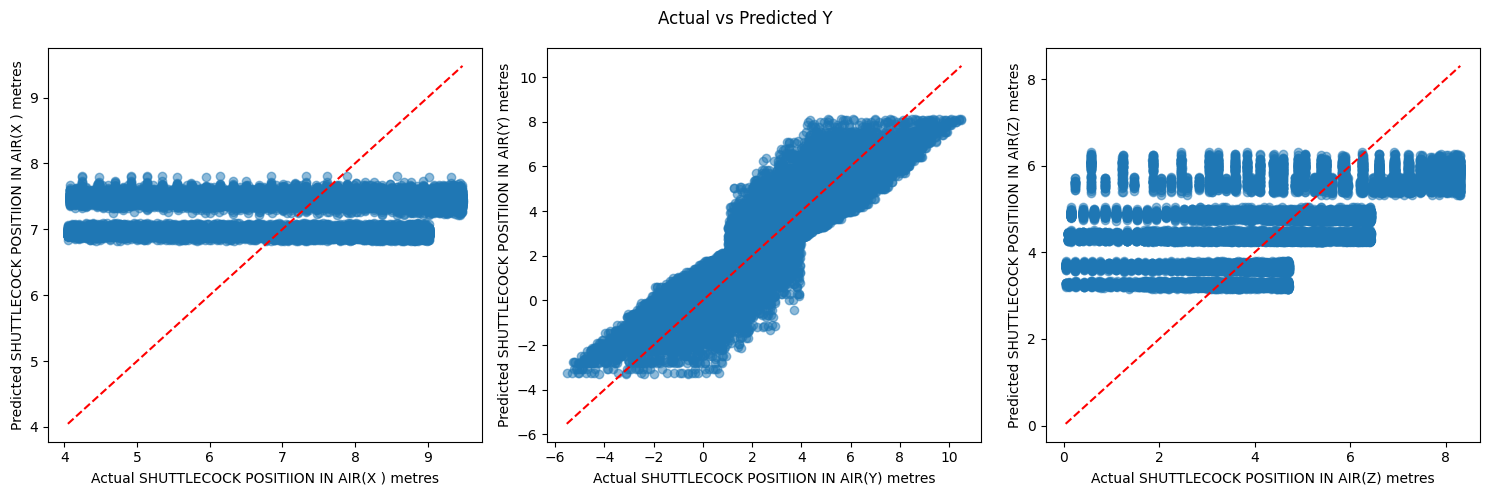

In [10]:
# Plotting the scatterplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting for each target variable
for i, target in enumerate(Y_features.columns):
    ax[i].scatter(y_test[target], y_pred[:, i], alpha=0.5)
    ax[i].plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--')
    ax[i].set_xlabel('Actual ' + target)
    ax[i].set_ylabel('Predicted ' + target)

plt.suptitle('Actual vs Predicted Y')
plt.tight_layout()
plt.show()